# Import essential libraries

In [ ]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Load the data

In [1]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import io
 
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic = df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


# Exploratory Data Analysis

## General

`df.describe()` shows a table with statistical summary for numerical data

In [ ]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


`df.info()` shows the number of non-null data point in each column. It also shows the data type of each columns

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


`df.shape` shows the number of rows and the number of columns in the dataframe. The first number is always the row and the second number is always the column

In [ ]:
titanic.shape

(891, 8)

`df.nunique()` shows the number of unique values for each column

In [ ]:
titanic.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

## Data visualization for each variable

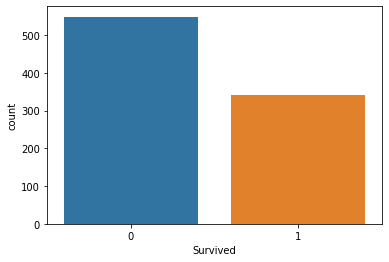

In [ ]:
sns.countplot(data = titanic, x='Survived')

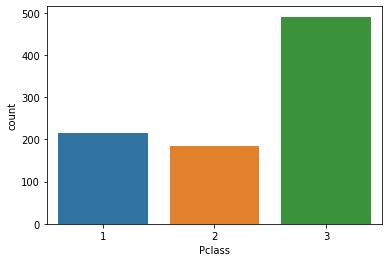

In [ ]:
sns.countplot(data = titanic, x='Pclass')

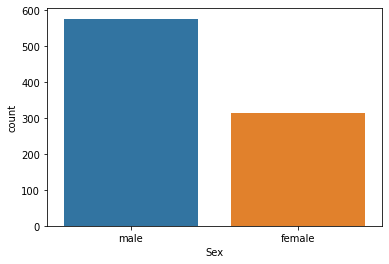

In [ ]:
sns.countplot(data=titanic, x='Sex')

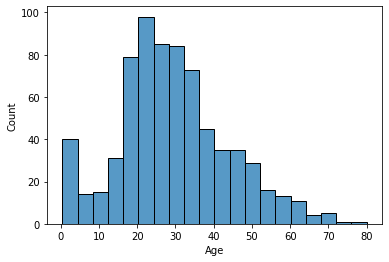

In [ ]:
sns.histplot(data=titanic, x='Age')

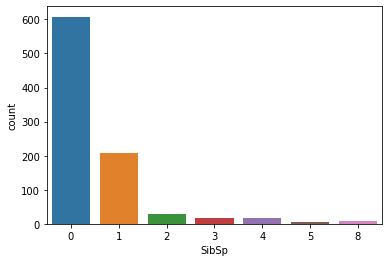

In [ ]:
sns.countplot(data = titanic, x = 'SibSp')

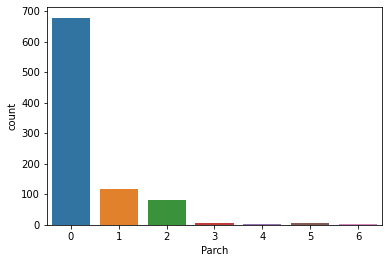

In [ ]:
sns.countplot(data = titanic, x = 'Parch')

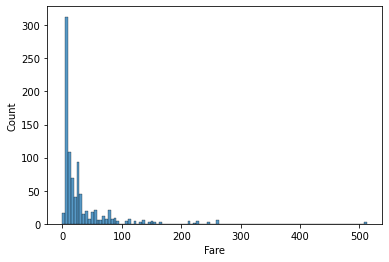

In [ ]:
sns.histplot(data=titanic, x='Fare')

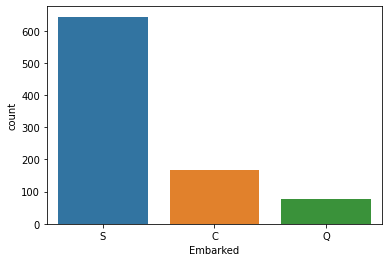

In [ ]:
sns.countplot(data=titanic, x='Embarked')

## Data visualization for correlation

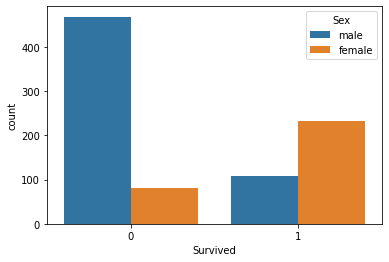

In [ ]:
sns.countplot(data = titanic, x='Survived', hue = 'Sex')

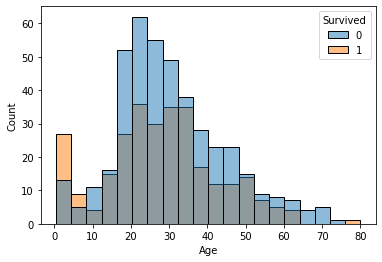

In [ ]:
sns.histplot(data = titanic, x='Age', hue='Survived')

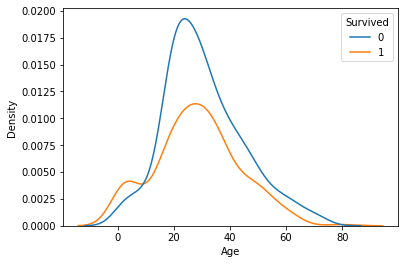

In [ ]:
sns.kdeplot(data = titanic, x='Age', hue='Survived')

# Machine Learning

## Manipulate the data

In [ ]:
titanic = df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
titanic = titanic.dropna()

In [ ]:
# titanic.loc[ titanic['Age'] <= 16, 'Age'] = 0
# titanic.loc[(titanic['Age'] > 16) & (titanic['Age'] <= 32), 'Age'] = 1
# titanic.loc[(titanic['Age'] > 32) & (titanic['Age'] <= 48), 'Age'] = 2
# titanic.loc[(titanic['Age'] > 48) & (titanic['Age'] <= 64), 'Age'] = 3
# titanic.loc[ titanic['Age'] > 64, 'Age'] = 4

In [ ]:
titanic = pd.get_dummies(titanic, drop_first = True)

## Split the dataset

In [ ]:
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']
columns = X.columns

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       108
           1       0.71      0.79      0.74        70

    accuracy                           0.79       178
   macro avg       0.78      0.79      0.78       178
weighted avg       0.79      0.79      0.79       178

[[85 23]
 [15 55]]


## Feature Importance

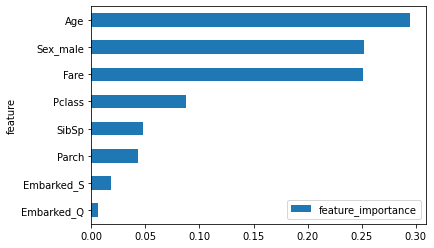

In [ ]:
feature_importance_df = pd.DataFrame({'feature': columns, 'feature_importance':model.feature_importances_}).sort_values(by='feature_importance', ascending=True)
feature_importance_df.plot(kind='barh', x='feature', y='feature_importance')